In [1]:
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10469 sha256=e532b5de08358fd9d3723e082173d075fdaa407bc5d85992db2f256fb347bc5b
  Stored in directory: /root/.cache/pip/wheels/e5/ad/b2/2ba1aaaf5b2004d96473291c80f98d4524a01c6d6e9d468172
Successfully built gvmagic


Enter values: ATGC TGCT GCTG CTGC TGCT


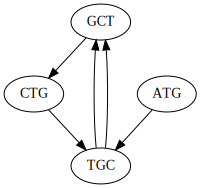

ATGCTGCT


In [2]:
import gvmagic


trail = []

def debruijnize(reads):
    nodes = set()
    #not_starts = set()
    edges = []
    for r in reads:
        r1 = r[:-1]
        r2 = r[1:]
        nodes.add(r1)
        nodes.add(r2)
        edges.append((r1,r2))
        #not_starts.add(r2)
    return (nodes,edges)


def make_node_edge_map(edges):
    node_edge_map = {}
    for e in edges:
        n = e[0]
        if n in node_edge_map:
            node_edge_map[n].append(e[1])
        else:
            node_edge_map[n] = [e[1]]
    return node_edge_map

def dfs(nodeslist,out,start,nemap):
  next = ""
  while out[nodeslist.index(start)] != 0:
         out[nodeslist.index(start)] = out[nodeslist.index(start)]-1
         next = nemap.get(start)[out[nodeslist.index(start)]]
         dfs(nodeslist,out,next,nemap)
  trail.insert(0,next[len(next)-1:]) 
  return trail

def eulerian_trail(m,G):
    nemap = m
    restrail = []
    start_trail = ""
    in_node = 0
    out_node = 0
    start = ""
    nodeslist = list(G[0])
    nodes = G[0]
    edges = G[1]
    IN = []
    OUT = []
    gene = ""

    for x in nodes:
      for y in edges:
        if y[1]==x:
          in_node = in_node + 1
        if y[0]==x:
          out_node = out_node + 1
      IN.append(in_node)
      OUT.append(out_node)
      in_node = 0
      out_node = 0

    for i in range(len(IN)):
      if (OUT[i] - IN[i] == 1):
        start = nodeslist[i]
        break;

    start_trail = start
    #trail = start_trail + dfs(nodeslist,OUT,start,nemap)
    restrail = dfs(nodeslist,OUT,start,nemap)
    restrail.insert(0,start_trail)
    
    for ele in restrail: 
        gene += ele  
    

    return gene
      
  
def visualize_debruijn(G):
    nodes = G[0]
    edges = G[1]
    dot_str= 'digraph "DeBruijn graph" {\n '
    for node in nodes:
        dot_str += '    %s [label="%s"] ;\n' %(node,node)
    for src,dst in edges:
        dot_str += '    %s->%s;\n' %(src,dst)
    return dot_str + '}\n'

x=input("Enter values: ")
reads = x.split(' ')
G = debruijnize(reads)
v = visualize_debruijn(G)
get_ipython().magic(u'load_ext gvmagic')
get_ipython().magic(u'dotstr visualize_debruijn(G)')
nemap = make_node_edge_map(G[1])
trail = eulerian_trail(nemap,G)
print(trail)       

    